# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

04:27:40 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=509429;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=284635;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=187427;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=532681;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

04:27:41 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=359756;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=575578;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

04:27:42 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=974539;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=286649;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

04:27:43 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=442577;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=348332;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

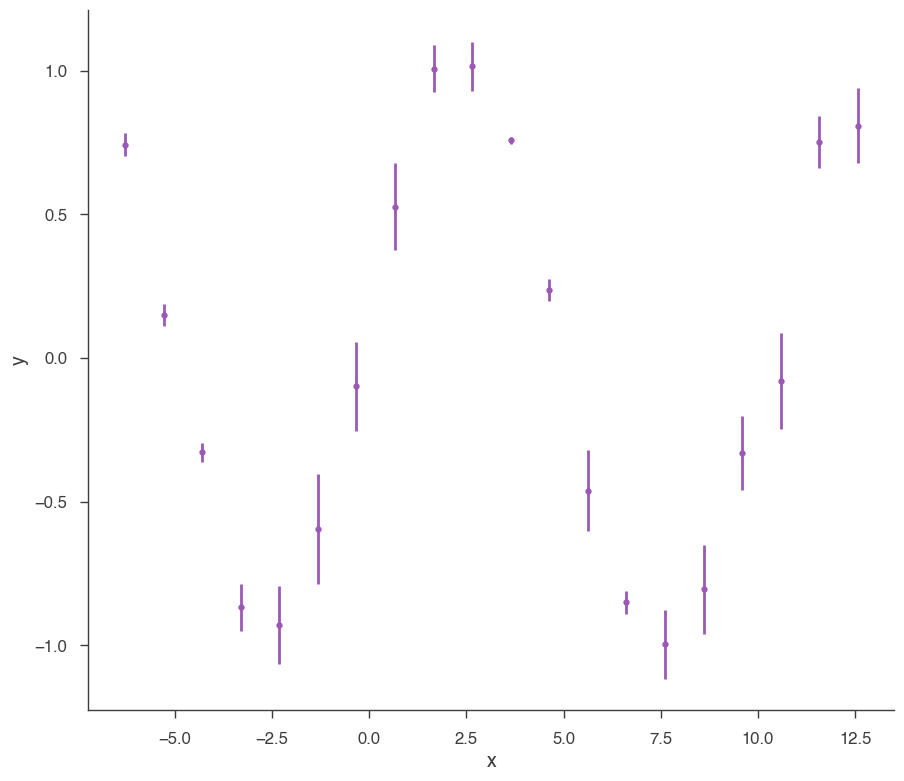

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=935415;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=416932;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

04:27:46 INFO      Mean acceptance fraction: 0.7133999999999999                                ]8;id=273579;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=315627;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

04:27:47 INFO      fit restored to maximum of posterior                                         ]8;id=725376;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=100043;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=816290;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=236590;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 -0.16 +0.14) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-12.894174
total,-12.894174


Values of statistical measures:

,statistical measures
AIC,30.494230
BIC,31.779812
DIC,29.753764
PDIC,1.979234


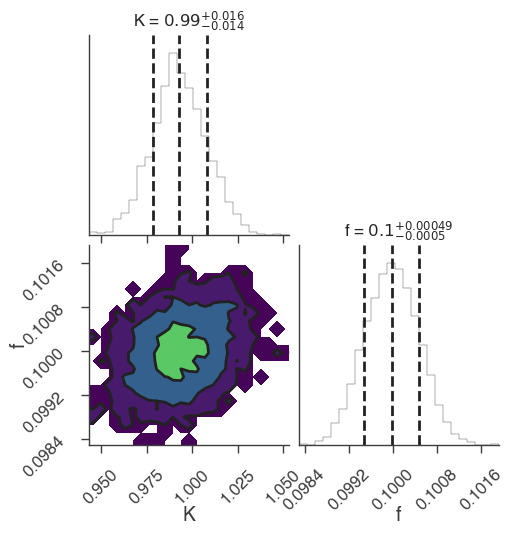

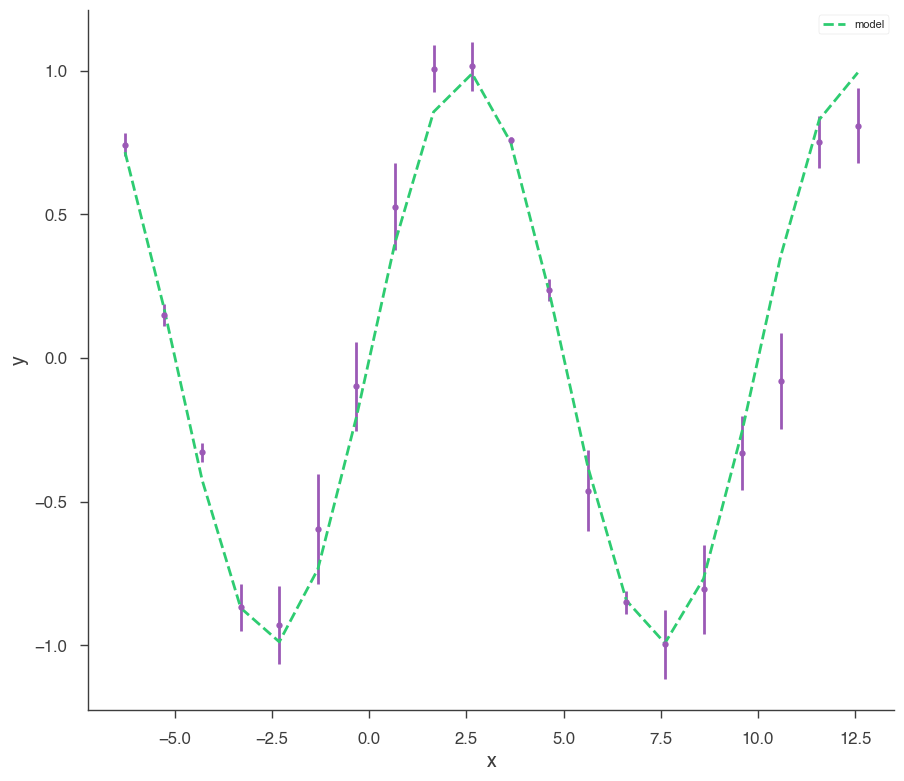

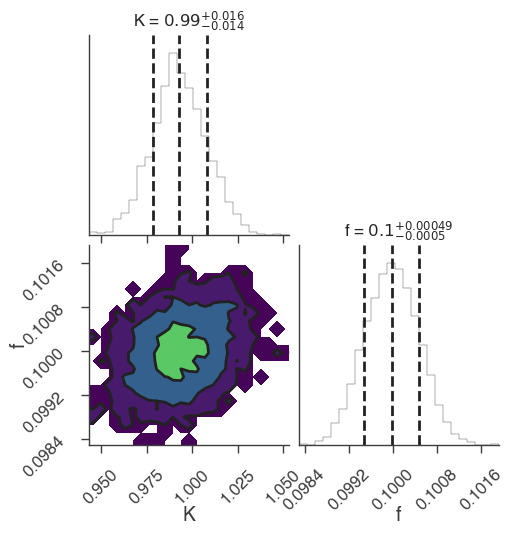

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

         INFO      sampler set to multinest                                                ]8;id=56071;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=780976;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -22.102470611503897      +/-  0.14366105131380952     
 Total Likelihood Evaluations:         5326
 Sampling finished. Exiting MultiNest



04:27:48 INFO      fit restored to maximum of posterior                                         ]8;id=279121;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=802182;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=222029;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=456694;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.95 +/- 0.14) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-12.896822
total,-12.896822


Values of statistical measures:

,statistical measures
AIC,30.499527
BIC,31.785109
DIC,29.720786
PDIC,1.964603
log(Z),-9.598981


         INFO      deleting the chain directory chains                                     ]8;id=662648;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=827531;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

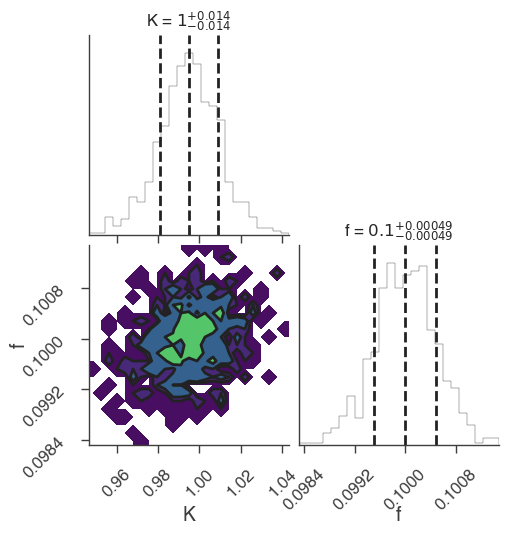

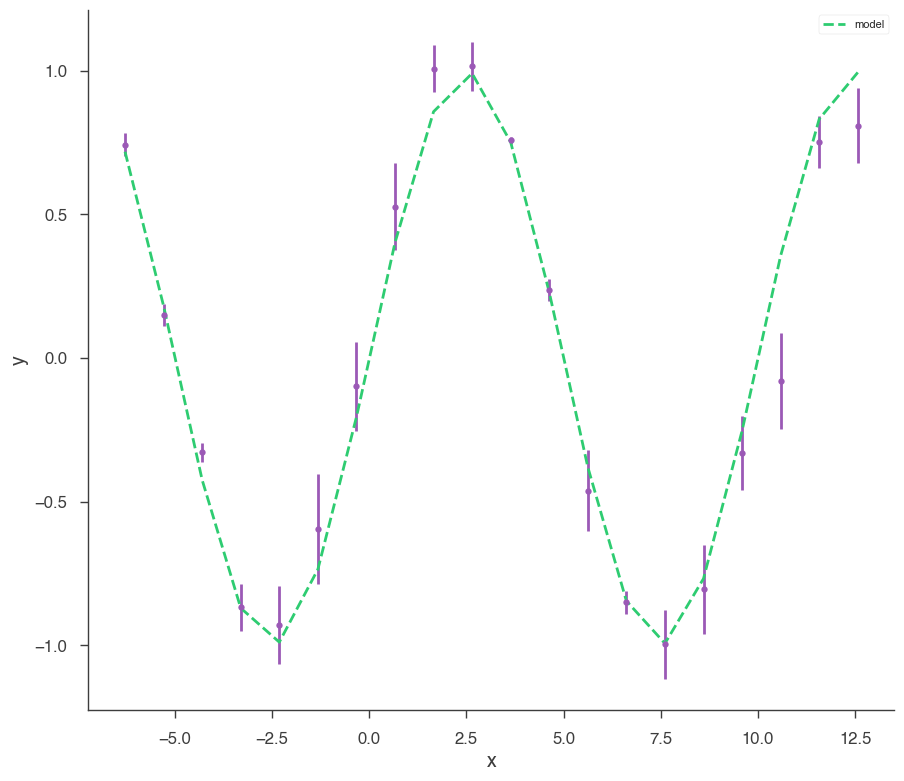

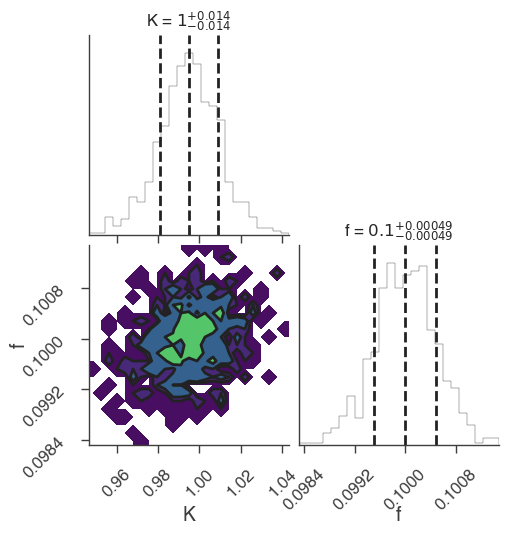

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

04:27:49 INFO      sampler set to dynesty_nested                                           ]8;id=870989;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=581285;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

239it [00:00, 2385.32it/s, bound: 0 | nc: 1 | ncall: 716 | eff(%): 33.380 | loglstar:   -inf < -3616.682 <    inf | logz: -3623.958 +/-  0.135 | dlogz: 3568.950 >  0.409]

478it [00:00, 1794.92it/s, bound: 0 | nc: 3 | ncall: 1383 | eff(%): 34.563 | loglstar:   -inf < -2159.566 <    inf | logz: -2166.761 +/-  0.124 | dlogz: 2145.781 >  0.409]

667it [00:00, 1502.54it/s, bound: 0 | nc: 1 | ncall: 2147 | eff(%): 31.067 | loglstar:   -inf < -1799.953 <    inf | logz: -1807.538 +/-  0.135 | dlogz: 1787.665 >  0.409]

825it [00:00, 1227.76it/s, bound: 0 | nc: 6 | ncall: 3199 | eff(%): 25.789 | loglstar:   -inf < -1407.376 <    inf | logz: -1415.202 +/-  0.136 | dlogz: 1400.924 >  0.409]

956it [00:00, 960.66it/s, bound: 0 | nc: 12 | ncall: 4539 | eff(%): 21.062 | loglstar:   -inf < -1144.546 <    inf | logz: -1153.617 +/-  0.150 | dlogz: 1145.555 >  0.409]

1062it [00:00, 843.34it/s, bound: 0 | nc: 49 | ncall: 5916 | eff(%): 17.951 | loglstar:   -inf < -796.410 <    inf | logz: -804.822 +/-  0.143 | dlogz: 790.048 >  0.409]  

1153it [00:01, 697.20it/s, bound: 0 | nc: 31 | ncall: 7416 | eff(%): 15.547 | loglstar:   -inf < -619.317 <    inf | logz: -628.465 +/-  0.146 | dlogz: 613.958 >  0.409]

1229it [00:01, 653.82it/s, bound: 0 | nc: 30 | ncall: 8689 | eff(%): 14.144 | loglstar:   -inf < -537.241 <    inf | logz: -545.620 +/-  0.138 | dlogz: 529.763 >  0.409]

1298it [00:01, 538.36it/s, bound: 0 | nc: 6 | ncall: 10263 | eff(%): 12.647 | loglstar:   -inf < -462.527 <    inf | logz: -471.692 +/-  0.146 | dlogz: 456.262 >  0.409]

1356it [00:01, 461.85it/s, bound: 0 | nc: 37 | ncall: 11580 | eff(%): 11.710 | loglstar:   -inf < -413.748 <    inf | logz: -422.331 +/-  0.136 | dlogz: 406.004 >  0.409]

1405it [00:01, 391.51it/s, bound: 0 | nc: 84 | ncall: 13203 | eff(%): 10.642 | loglstar:   -inf < -368.359 <    inf | logz: -378.087 +/-  0.149 | dlogz: 362.749 >  0.409]

1447it [00:02, 312.80it/s, bound: 1 | nc: 1 | ncall: 14380 | eff(%): 10.063 | loglstar:   -inf < -333.989 <    inf | logz: -343.209 +/-  0.149 | dlogz: 327.210 >  0.409] 

1669it [00:02, 642.52it/s, bound: 1 | nc: 3 | ncall: 14686 | eff(%): 11.365 | loglstar:   -inf < -221.440 <    inf | logz: -230.508 +/-  0.143 | dlogz: 213.372 >  0.409]

1804it [00:02, 634.55it/s, bound: 2 | nc: 1 | ncall: 14966 | eff(%): 12.054 | loglstar:   -inf < -152.878 <    inf | logz: -162.884 +/-  0.151 | dlogz: 145.798 >  0.409]

2016it [00:02, 910.75it/s, bound: 2 | nc: 3 | ncall: 15277 | eff(%): 13.196 | loglstar:   -inf < -87.807 <    inf | logz: -97.094 +/-  0.147 | dlogz: 79.030 >  0.409]   

2146it [00:02, 827.87it/s, bound: 3 | nc: 1 | ncall: 15569 | eff(%): 13.784 | loglstar:   -inf < -68.016 <    inf | logz: -77.562 +/-  0.145 | dlogz: 59.152 >  0.409]

2325it [00:02, 1019.69it/s, bound: 3 | nc: 6 | ncall: 15815 | eff(%): 14.701 | loglstar:   -inf < -49.019 <    inf | logz: -58.186 +/-  0.143 | dlogz: 39.461 >  0.409]

2470it [00:02, 1113.79it/s, bound: 3 | nc: 3 | ncall: 16108 | eff(%): 15.334 | loglstar:   -inf < -38.955 <    inf | logz: -48.414 +/-  0.145 | dlogz: 29.322 >  0.409]

2602it [00:03, 987.01it/s, bound: 4 | nc: 1 | ncall: 16301 | eff(%): 15.962 | loglstar:   -inf < -31.844 <    inf | logz: -40.980 +/-  0.144 | dlogz: 21.526 >  0.409] 

2745it [00:03, 1086.92it/s, bound: 4 | nc: 2 | ncall: 16548 | eff(%): 16.588 | loglstar:   -inf < -26.349 <    inf | logz: -35.597 +/-  0.145 | dlogz: 15.797 >  0.409]

2869it [00:03, 909.23it/s, bound: 5 | nc: 1 | ncall: 16795 | eff(%): 17.082 | loglstar:   -inf < -22.774 <    inf | logz: -32.176 +/-  0.145 | dlogz: 12.063 >  0.409] 

3104it [00:03, 1226.03it/s, bound: 5 | nc: 5 | ncall: 17113 | eff(%): 18.138 | loglstar:   -inf < -18.708 <    inf | logz: -28.171 +/-  0.145 | dlogz:  7.475 >  0.409]

3249it [00:03, 1007.05it/s, bound: 6 | nc: 2 | ncall: 17388 | eff(%): 18.685 | loglstar:   -inf < -17.034 <    inf | logz: -26.496 +/-  0.145 | dlogz:  5.489 >  0.409]

3445it [00:03, 1208.49it/s, bound: 6 | nc: 2 | ncall: 17684 | eff(%): 19.481 | loglstar:   -inf < -15.341 <    inf | logz: -24.883 +/-  0.146 | dlogz:  3.413 >  0.409]

3589it [00:04, 770.34it/s, bound: 7 | nc: 1 | ncall: 17994 | eff(%): 19.946 | loglstar:   -inf < -14.625 <    inf | logz: -24.111 +/-  0.146 | dlogz:  2.346 >  0.409] 

3832it [00:04, 1049.32it/s, bound: 7 | nc: 1 | ncall: 18339 | eff(%): 20.895 | loglstar:   -inf < -13.869 <    inf | logz: -23.352 +/-  0.146 | dlogz:  1.230 >  0.409]

3984it [00:04, 976.75it/s, bound: 8 | nc: 1 | ncall: 18626 | eff(%): 21.389 | loglstar:   -inf < -13.603 <    inf | logz: -23.065 +/-  0.146 | dlogz:  0.807 >  0.409] 

4163it [00:04, 1131.99it/s, bound: 8 | nc: 1 | ncall: 18881 | eff(%): 22.049 | loglstar:   -inf < -13.332 <    inf | logz: -22.836 +/-  0.146 | dlogz:  0.491 >  0.409]

4228it [00:04, 888.58it/s, +400 | bound: 8 | nc: 1 | ncall: 19405 | eff(%): 24.351 | loglstar:   -inf < -12.902 <    inf | logz: -22.423 +/-  0.146 | dlogz:  0.001 >  0.409]

04:27:54 INFO      fit restored to maximum of posterior                                         ]8;id=879296;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=903641;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=923015;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=186958;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 -0.16 +0.15) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-12.896248
total,-12.896248


Values of statistical measures:

,statistical measures
AIC,30.498377
BIC,31.783960
DIC,29.875028
PDIC,2.043067
log(Z),-9.738364


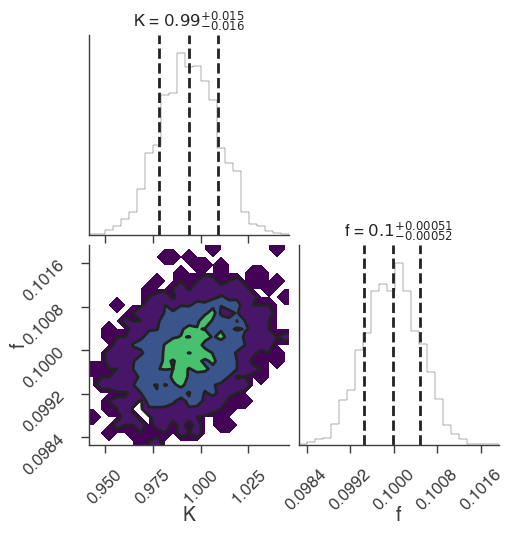

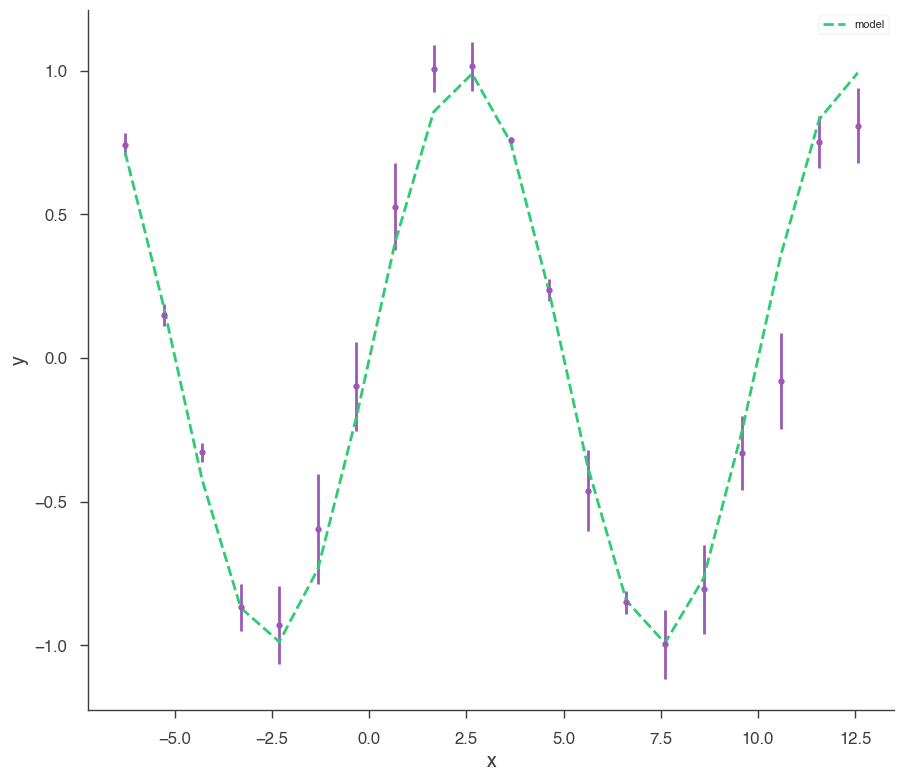

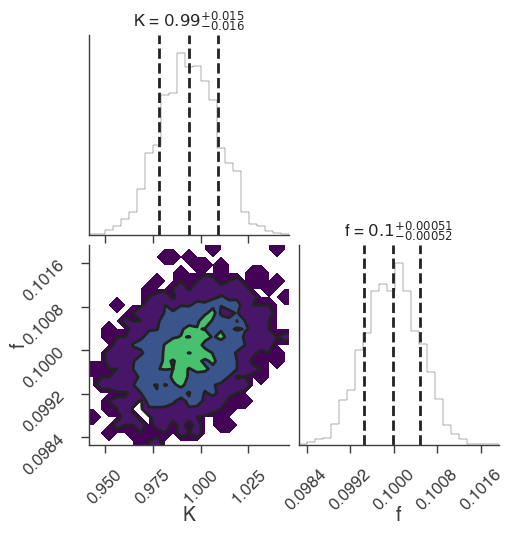

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

04:27:55 INFO      sampler set to dynesty_dynamic                                          ]8;id=423832;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=462325;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

59it [00:00, 589.03it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 63 | eff(%): 10.480 | loglstar:   -inf < -9680.171 <    inf | logz: -9687.196 +/-  0.118 | dlogz: 9668.626 >  0.010]

250it [00:00, 1358.96it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 327 | eff(%): 30.230 | loglstar:   -inf < -4412.767 <    inf | logz: -4420.172 +/-  0.121 | dlogz: 4404.038 >  0.010]

397it [00:00, 1406.47it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 606 | eff(%): 35.895 | loglstar:   -inf < -2844.004 <    inf | logz: -2851.680 +/-  0.123 | dlogz: 2832.952 >  0.010]

538it [00:00, 1333.65it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 991 | eff(%): 36.083 | loglstar:   -inf < -2235.901 <    inf | logz: -2243.417 +/-  0.116 | dlogz: 2221.343 >  0.010]

672it [00:00, 1235.02it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1471 | eff(%): 34.094 | loglstar:   -inf < -2025.271 <    inf | logz: -2033.502 +/-  0.127 | dlogz: 2014.520 >  0.010]

797it [00:00, 1115.89it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 2061 | eff(%): 31.121 | loglstar:   -inf < -1810.171 <    inf | logz: -1817.837 +/-  0.119 | dlogz: 1795.304 >  0.010]

911it [00:00, 1079.71it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2740 | eff(%): 28.117 | loglstar:   -inf < -1589.800 <    inf | logz: -1598.359 +/-  0.128 | dlogz: 1577.092 >  0.010] 

1021it [00:00, 920.79it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 3545 | eff(%): 25.241 | loglstar:   -inf < -1428.475 <    inf | logz: -1436.900 +/-  0.125 | dlogz: 1414.328 >  0.010]

1117it [00:01, 905.42it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4253 | eff(%): 23.501 | loglstar:   -inf < -1331.520 <    inf | logz: -1339.548 +/-  0.119 | dlogz: 1320.802 >  0.010] 

1211it [00:01, 779.75it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 5183 | eff(%): 21.309 | loglstar:   -inf < -1138.123 <    inf | logz: -1147.305 +/-  0.132 | dlogz: 1129.944 >  0.010]

1293it [00:01, 701.05it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6137 | eff(%): 19.482 | loglstar:   -inf < -896.831 <    inf | logz: -905.690 +/-  0.130 | dlogz: 887.311 >  0.010]   

1367it [00:01, 586.55it/s, batch: 0 | bound: 0 | nc: 43 | ncall: 7424 | eff(%): 17.251 | loglstar:   -inf < -769.230 <    inf | logz: -778.655 +/-  0.133 | dlogz: 760.875 >  0.010]

1430it [00:01, 513.55it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 8512 | eff(%): 15.868 | loglstar:   -inf < -664.027 <    inf | logz: -672.854 +/-  0.127 | dlogz: 653.652 >  0.010] 

1485it [00:01, 494.03it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 9235 | eff(%): 15.254 | loglstar:   -inf < -581.370 <    inf | logz: -590.531 +/-  0.129 | dlogz: 571.407 >  0.010]

1537it [00:02, 450.86it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 10223 | eff(%): 14.334 | loglstar:   -inf < -531.199 <    inf | logz: -539.223 +/-  0.121 | dlogz: 519.188 >  0.010]

1584it [00:02, 408.44it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 11076 | eff(%): 13.683 | loglstar:   -inf < -490.638 <    inf | logz: -499.128 +/-  0.122 | dlogz: 482.630 >  0.010]

1626it [00:02, 374.80it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 12096 | eff(%): 12.909 | loglstar:   -inf < -451.607 <    inf | logz: -460.445 +/-  0.129 | dlogz: 444.263 >  0.010]

1665it [00:02, 325.79it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 13251 | eff(%): 12.108 | loglstar:   -inf < -424.412 <    inf | logz: -432.649 +/-  0.123 | dlogz: 415.917 >  0.010] 

1699it [00:02, 314.34it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 14312 | eff(%): 11.470 | loglstar:   -inf < -403.489 <    inf | logz: -412.324 +/-  0.128 | dlogz: 395.823 >  0.010]

1731it [00:02, 303.70it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 14987 | eff(%): 11.177 | loglstar:   -inf < -386.512 <    inf | logz: -395.651 +/-  0.129 | dlogz: 379.263 >  0.010]

1762it [00:02, 258.76it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 16151 | eff(%): 10.582 | loglstar:   -inf < -365.428 <    inf | logz: -374.099 +/-  0.129 | dlogz: 357.423 >  0.010]

1789it [00:03, 236.68it/s, batch: 0 | bound: 0 | nc: 98 | ncall: 17105 | eff(%): 10.162 | loglstar:   -inf < -349.356 <    inf | logz: -358.294 +/-  0.127 | dlogz: 341.533 >  0.010]

1814it [00:03, 200.66it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17573 | eff(%): 10.037 | loglstar:   -inf < -333.525 <    inf | logz: -342.062 +/-  0.126 | dlogz: 325.182 >  0.010] 

2018it [00:03, 589.93it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17862 | eff(%): 10.990 | loglstar:   -inf < -220.197 <    inf | logz: -229.575 +/-  0.131 | dlogz: 212.744 >  0.010]

2148it [00:03, 754.29it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18108 | eff(%): 11.543 | loglstar:   -inf < -174.372 <    inf | logz: -184.098 +/-  0.133 | dlogz: 167.160 >  0.010]

2240it [00:03, 626.86it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18326 | eff(%): 11.898 | loglstar:   -inf < -146.823 <    inf | logz: -156.046 +/-  0.130 | dlogz: 138.588 >  0.010]

2478it [00:03, 1010.10it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 18656 | eff(%): 12.936 | loglstar:   -inf < -95.527 <    inf | logz: -104.655 +/-  0.129 | dlogz: 86.865 >  0.010] 

2655it [00:03, 1191.06it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18982 | eff(%): 13.628 | loglstar:   -inf < -74.051 <    inf | logz: -83.847 +/-  0.132 | dlogz: 65.742 >  0.010] 

2796it [00:04, 978.20it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19189 | eff(%): 14.201 | loglstar:   -inf < -57.840 <    inf | logz: -67.854 +/-  0.133 | dlogz: 49.465 >  0.010] 

2979it [00:04, 1166.29it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19465 | eff(%): 14.921 | loglstar:   -inf < -45.338 <    inf | logz: -54.701 +/-  0.129 | dlogz: 35.835 >  0.010]

3131it [00:04, 1249.30it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19791 | eff(%): 15.430 | loglstar:   -inf < -36.707 <    inf | logz: -46.169 +/-  0.131 | dlogz: 27.055 >  0.010]

3273it [00:04, 1044.03it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19983 | eff(%): 15.979 | loglstar:   -inf < -30.293 <    inf | logz: -39.629 +/-  0.130 | dlogz: 20.215 >  0.010]

3456it [00:04, 1222.39it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 20319 | eff(%): 16.600 | loglstar:   -inf < -25.238 <    inf | logz: -34.575 +/-  0.129 | dlogz: 14.785 >  0.010]

3596it [00:04, 980.37it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20589 | eff(%): 17.052 | loglstar:   -inf < -22.797 <    inf | logz: -32.041 +/-  0.128 | dlogz: 11.964 >  0.010] 

3813it [00:04, 1233.93it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20909 | eff(%): 17.810 | loglstar:   -inf < -19.041 <    inf | logz: -28.530 +/-  0.130 | dlogz:  8.017 >  0.010]

3970it [00:04, 1311.78it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 21210 | eff(%): 18.287 | loglstar:   -inf < -17.418 <    inf | logz: -26.812 +/-  0.130 | dlogz:  5.983 >  0.010]

4120it [00:05, 1103.97it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21434 | eff(%): 18.784 | loglstar:   -inf < -16.277 <    inf | logz: -25.656 +/-  0.130 | dlogz:  4.534 >  0.010]

4316it [00:05, 1296.38it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21757 | eff(%): 19.392 | loglstar:   -inf < -15.172 <    inf | logz: -24.595 +/-  0.130 | dlogz:  3.114 >  0.010]

4467it [00:05, 1062.81it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22069 | eff(%): 19.793 | loglstar:   -inf < -14.585 <    inf | logz: -24.008 +/-  0.130 | dlogz:  2.293 >  0.010]

4676it [00:05, 1283.03it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22356 | eff(%): 20.459 | loglstar:   -inf < -14.016 <    inf | logz: -23.451 +/-  0.130 | dlogz:  1.472 >  0.010]

4861it [00:05, 1413.02it/s, batch: 0 | bound: 7 | nc: 10 | ncall: 22725 | eff(%): 20.930 | loglstar:   -inf < -13.652 <    inf | logz: -23.108 +/-  0.130 | dlogz:  0.973 >  0.010]

5022it [00:05, 1157.11it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22973 | eff(%): 21.395 | loglstar:   -inf < -13.476 <    inf | logz: -22.898 +/-  0.130 | dlogz:  0.676 >  0.010] 

5228it [00:05, 1353.41it/s, batch: 0 | bound: 8 | nc: 6 | ncall: 23309 | eff(%): 21.958 | loglstar:   -inf < -13.281 <    inf | logz: -22.714 +/-  0.130 | dlogz:  0.427 >  0.010]

5385it [00:06, 1077.10it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23620 | eff(%): 22.326 | loglstar:   -inf < -13.188 <    inf | logz: -22.617 +/-  0.130 | dlogz:  0.302 >  0.010]

5647it [00:06, 1397.12it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24010 | eff(%): 23.040 | loglstar:   -inf < -13.075 <    inf | logz: -22.509 +/-  0.130 | dlogz:  0.172 >  0.010]

5817it [00:06, 1148.58it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24349 | eff(%): 23.409 | loglstar:   -inf < -13.030 <    inf | logz: -22.463 +/-  0.130 | dlogz:  0.120 >  0.010]

6026it [00:06, 1339.96it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24651 | eff(%): 23.959 | loglstar:   -inf < -12.984 <    inf | logz: -22.425 +/-  0.130 | dlogz:  0.078 >  0.010]

6196it [00:06, 1419.62it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25003 | eff(%): 24.295 | loglstar:   -inf < -12.962 <    inf | logz: -22.404 +/-  0.130 | dlogz:  0.055 >  0.010]

6361it [00:06, 1126.18it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25239 | eff(%): 24.713 | loglstar:   -inf < -12.944 <    inf | logz: -22.389 +/-  0.130 | dlogz:  0.039 >  0.010]

6532it [00:07, 1247.75it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25536 | eff(%): 25.088 | loglstar:   -inf < -12.930 <    inf | logz: -22.378 +/-  0.130 | dlogz:  0.028 >  0.010]

6679it [00:07, 1006.52it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25857 | eff(%): 25.341 | loglstar:   -inf < -12.922 <    inf | logz: -22.371 +/-  0.130 | dlogz:  0.021 >  0.010]

6880it [00:07, 1209.81it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26135 | eff(%): 25.831 | loglstar:   -inf < -12.914 <    inf | logz: -22.364 +/-  0.130 | dlogz:  0.014 >  0.010]

7051it [00:07, 1322.08it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26455 | eff(%): 26.171 | loglstar:   -inf < -12.911 <    inf | logz: -22.360 +/-  0.130 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7538it [00:08, 726.03it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26942 | eff(%): 27.979 | loglstar: -14.758 < -13.073 < -13.439 | logz: -22.350 +/-  0.134 | stop:  1.468]          

7768it [00:08, 888.89it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27257 | eff(%): 27.965 | loglstar: -14.758 < -14.151 < -13.439 | logz: -22.350 +/-  0.134 | stop:  1.468]

7946it [00:08, 1003.07it/s, batch: 1 | bound: 2 | nc: 5 | ncall: 27607 | eff(%): 28.249 | loglstar: -14.758 < -13.794 < -13.439 | logz: -22.350 +/-  0.134 | stop:  1.468]

8108it [00:08, 953.55it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27854 | eff(%): 28.574 | loglstar: -14.758 < -13.528 < -13.439 | logz: -22.350 +/-  0.134 | stop:  1.468] 

8547it [00:08, 1508.19it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28348 | eff(%): 29.993 | loglstar: -14.758 < -13.045 < -13.439 | logz: -22.350 +/-  0.134 | stop:  1.468]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8776it [00:09, 655.16it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28595 | eff(%): 30.129 | loglstar: -15.248 < -14.899 < -14.756 | logz: -22.358 +/-  0.110 | stop:  1.031] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9317it [00:10, 601.89it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 29179 | eff(%): 31.930 | loglstar: -15.675 < -13.117 < -15.246 | logz: -22.354 +/-  0.102 | stop:  1.008]

9727it [00:10, 843.46it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29604 | eff(%): 32.672 | loglstar: -15.675 < -13.639 < -15.246 | logz: -22.354 +/-  0.102 | stop:  1.008]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9893it [00:11, 859.34it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29772 | eff(%): 33.229 | loglstar: -15.675 < -12.911 < -15.246 | logz: -22.354 +/-  0.102 | stop:  0.919]

04:28:07 INFO      fit restored to maximum of posterior                                         ]8;id=91525;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=656588;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=207769;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=320848;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 +/- 0.15) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-12.894278
total,-12.894278


Values of statistical measures:

,statistical measures
AIC,30.494438
BIC,31.780020
DIC,29.813058
PDIC,2.012386
log(Z),-9.701605


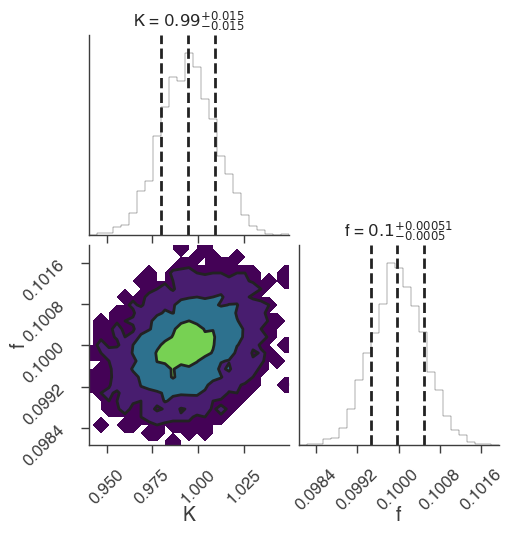

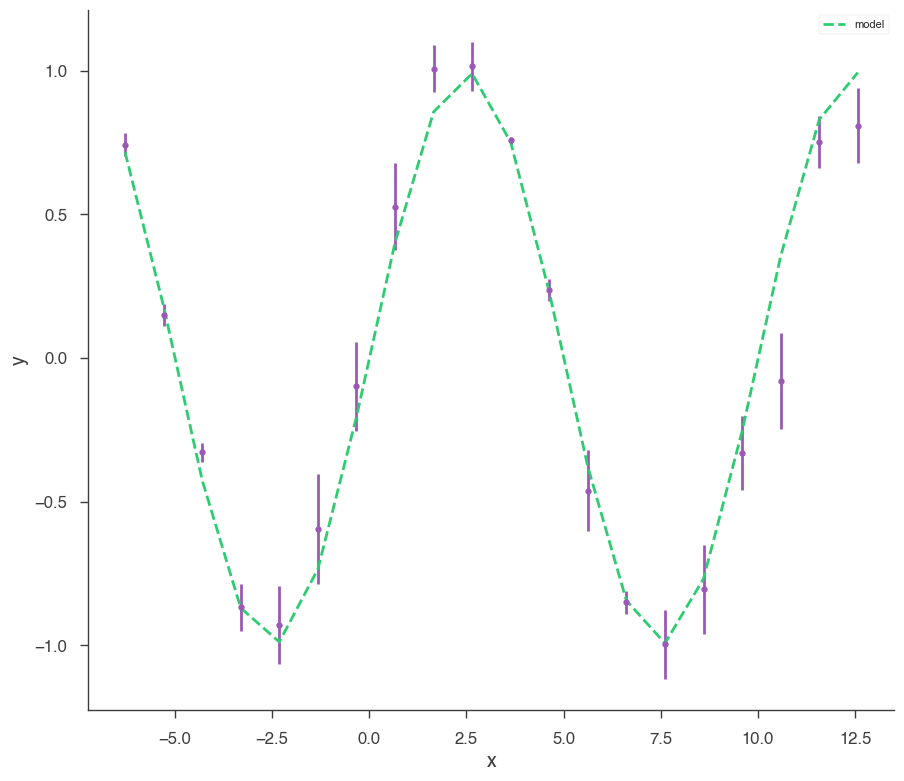

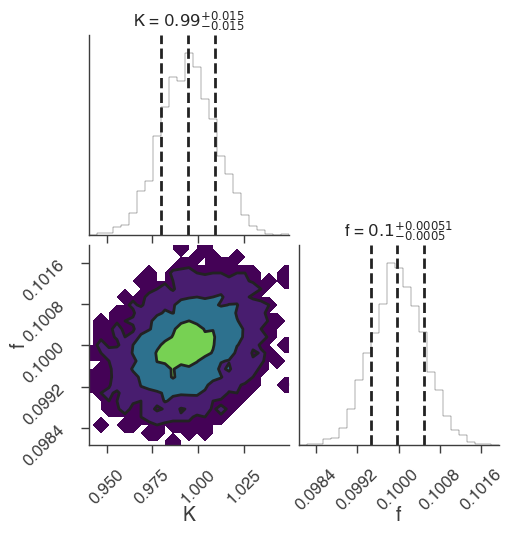

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

04:28:08 INFO      sampler set to zeus                                                     ]8;id=168869;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=713826;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 56.04it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:11, 51.11it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:11, 52.16it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:10, 54.74it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:09, 61.12it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:08, 66.66it/s]

Sampling progress :   8%|▊         | 48/625 [00:00<00:08, 69.27it/s]

Sampling progress :   9%|▉         | 55/625 [00:00<00:08, 67.13it/s]

Sampling progress :  10%|▉         | 62/625 [00:01<00:09, 61.69it/s]

Sampling progress :  11%|█         | 69/625 [00:01<00:08, 62.71it/s]

Sampling progress :  12%|█▏        | 77/625 [00:01<00:08, 65.70it/s]

Sampling progress :  13%|█▎        | 84/625 [00:01<00:08, 63.64it/s]

Sampling progress :  15%|█▍        | 93/625 [00:01<00:07, 69.44it/s]

Sampling progress :  16%|█▌        | 100/625 [00:01<00:07, 66.71it/s]

Sampling progress :  17%|█▋        | 107/625 [00:01<00:08, 64.45it/s]

Sampling progress :  18%|█▊        | 114/625 [00:01<00:08, 62.84it/s]

Sampling progress :  19%|█▉        | 121/625 [00:01<00:08, 62.70it/s]

Sampling progress :  20%|██        | 128/625 [00:02<00:08, 59.68it/s]

Sampling progress :  22%|██▏       | 135/625 [00:02<00:07, 62.10it/s]

Sampling progress :  23%|██▎       | 142/625 [00:02<00:08, 59.62it/s]

Sampling progress :  24%|██▍       | 149/625 [00:02<00:08, 54.98it/s]

Sampling progress :  25%|██▍       | 155/625 [00:02<00:08, 54.78it/s]

Sampling progress :  26%|██▌       | 161/625 [00:02<00:08, 53.61it/s]

Sampling progress :  27%|██▋       | 169/625 [00:02<00:07, 59.68it/s]

Sampling progress :  28%|██▊       | 176/625 [00:02<00:07, 60.28it/s]

Sampling progress :  29%|██▉       | 183/625 [00:03<00:07, 56.08it/s]

Sampling progress :  30%|███       | 189/625 [00:03<00:07, 55.72it/s]

Sampling progress :  31%|███       | 195/625 [00:03<00:07, 54.85it/s]

Sampling progress :  32%|███▏      | 202/625 [00:03<00:07, 58.82it/s]

Sampling progress :  34%|███▎      | 210/625 [00:03<00:06, 64.64it/s]

Sampling progress :  35%|███▍      | 217/625 [00:03<00:06, 65.30it/s]

Sampling progress :  36%|███▌      | 225/625 [00:03<00:05, 67.40it/s]

Sampling progress :  37%|███▋      | 232/625 [00:03<00:06, 64.96it/s]

Sampling progress :  38%|███▊      | 239/625 [00:03<00:05, 65.62it/s]

Sampling progress :  40%|███▉      | 247/625 [00:03<00:05, 67.99it/s]

Sampling progress :  41%|████      | 256/625 [00:04<00:05, 72.16it/s]

Sampling progress :  42%|████▏     | 264/625 [00:04<00:05, 67.56it/s]

Sampling progress :  44%|████▎     | 272/625 [00:04<00:05, 68.64it/s]

Sampling progress :  45%|████▍     | 279/625 [00:04<00:05, 66.77it/s]

Sampling progress :  46%|████▌     | 286/625 [00:04<00:05, 67.03it/s]

Sampling progress :  47%|████▋     | 294/625 [00:04<00:04, 69.51it/s]

Sampling progress :  48%|████▊     | 302/625 [00:04<00:04, 72.13it/s]

Sampling progress :  50%|████▉     | 310/625 [00:04<00:04, 71.26it/s]

Sampling progress :  51%|█████     | 318/625 [00:05<00:04, 68.32it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:05<00:04, 70.07it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:05<00:04, 72.31it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:05<00:03, 76.04it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:05<00:03, 75.06it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:05<00:03, 73.64it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:05<00:03, 69.53it/s]

Sampling progress :  60%|██████    | 375/625 [00:05<00:03, 69.29it/s]

Sampling progress :  61%|██████    | 382/625 [00:05<00:03, 68.35it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:06<00:03, 70.99it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:06<00:03, 74.95it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:06<00:03, 71.33it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:06<00:02, 70.16it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:06<00:02, 71.94it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:06<00:02, 74.79it/s]

Sampling progress :  70%|███████   | 440/625 [00:06<00:02, 76.10it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:06<00:02, 72.51it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:06<00:02, 67.33it/s]

Sampling progress :  74%|███████▍  | 464/625 [00:07<00:02, 69.91it/s]

Sampling progress :  76%|███████▌  | 472/625 [00:07<00:02, 69.04it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:07<00:02, 70.69it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:07<00:01, 70.46it/s]

Sampling progress :  79%|███████▉  | 496/625 [00:07<00:01, 70.36it/s]

Sampling progress :  81%|████████  | 504/625 [00:07<00:01, 68.38it/s]

Sampling progress :  82%|████████▏ | 512/625 [00:07<00:01, 70.96it/s]

Sampling progress :  83%|████████▎ | 520/625 [00:07<00:01, 69.71it/s]

Sampling progress :  84%|████████▍ | 528/625 [00:07<00:01, 72.05it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:08<00:01, 71.29it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:08<00:01, 73.18it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:08<00:01, 68.17it/s]

Sampling progress :  90%|████████▉ | 560/625 [00:08<00:00, 69.95it/s]

Sampling progress :  91%|█████████ | 568/625 [00:08<00:00, 71.41it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:08<00:00, 74.48it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:08<00:00, 73.33it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:08<00:00, 64.86it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:09<00:00, 64.69it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:09<00:00, 67.67it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:09<00:00, 71.57it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 67.14it/s]

04:28:17 INFO      fit restored to maximum of posterior                                         ]8;id=717749;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=109411;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=973361;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=645565;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 29


Scale Factor: 1.329015


Mean Integrated Autocorrelation Time: 3.04


Effective Sample Size: 4105.45


Number of Log Probability Evaluations: 64772


Effective Samples per Log Probability Evaluation: 0.063383


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 +/- 0.15) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-12.894097
total,-12.894097


Values of statistical measures:

,statistical measures
AIC,30.494076
BIC,31.779658
DIC,29.904689
PDIC,2.057964


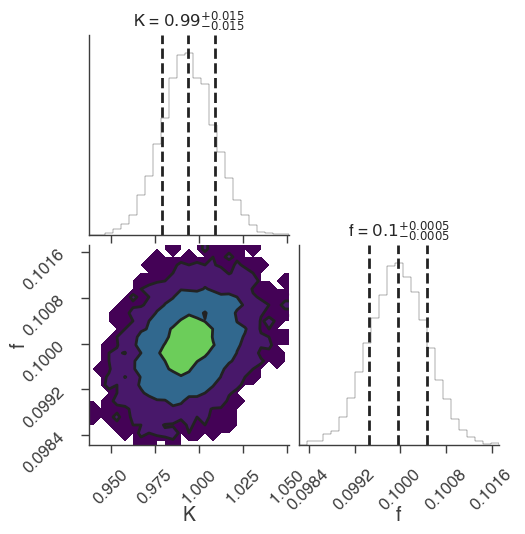

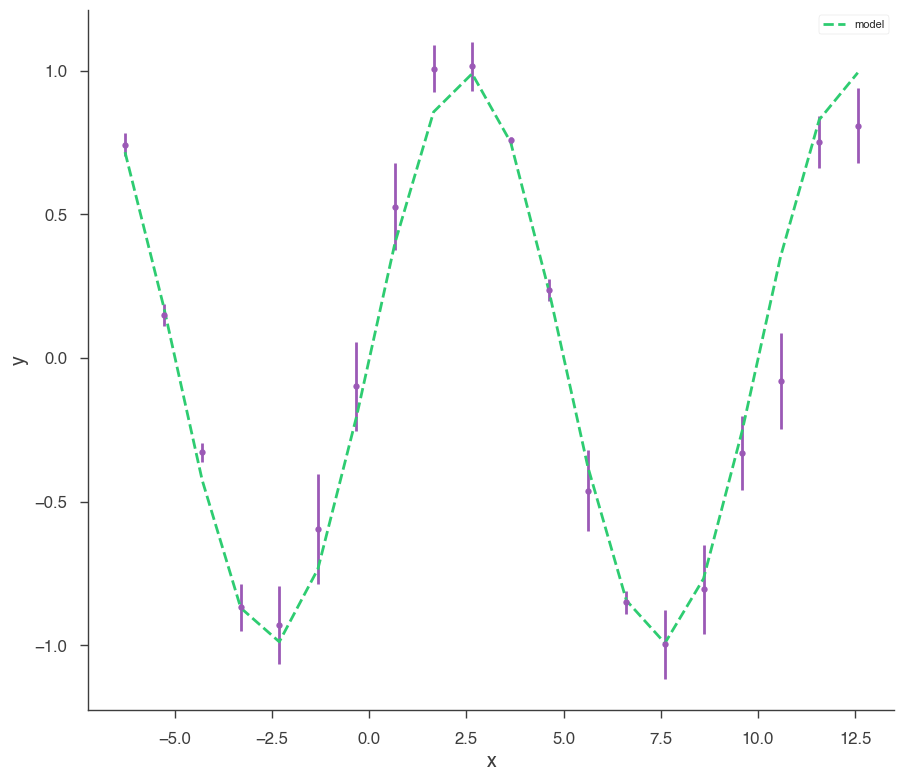

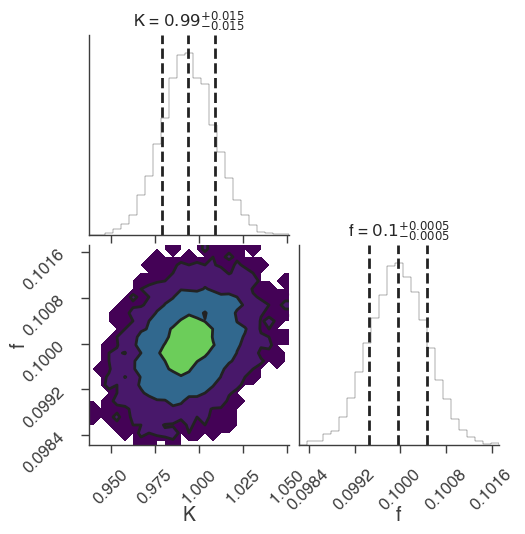

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

04:28:18 INFO      sampler set to ultranest                                                ]8;id=465046;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=808013;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 7631


[ultranest]   logZ = -22.51 +- 0.09828


[ultranest] Effective samples strategy satisfied (ESS = 969.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


04:28:26 INFO      fit restored to maximum of posterior                                         ]8;id=215803;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=515593;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=38583;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=84974;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.95 -0.17 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-12.896389
total,-12.896389


Values of statistical measures:

,statistical measures
AIC,30.498660
BIC,31.784242
DIC,29.704227
PDIC,1.954864
log(Z),-9.776028


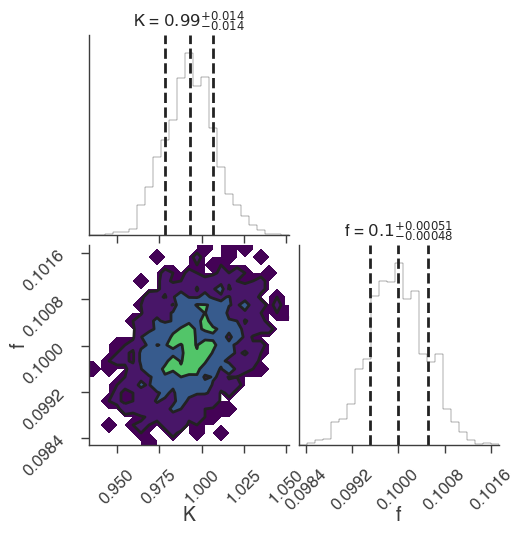

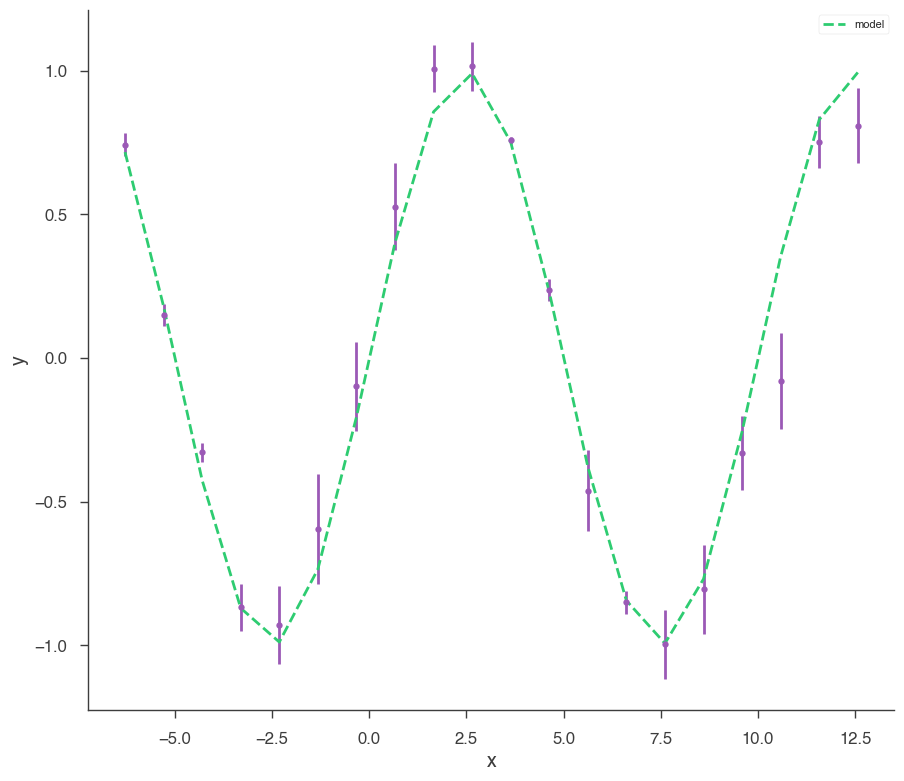

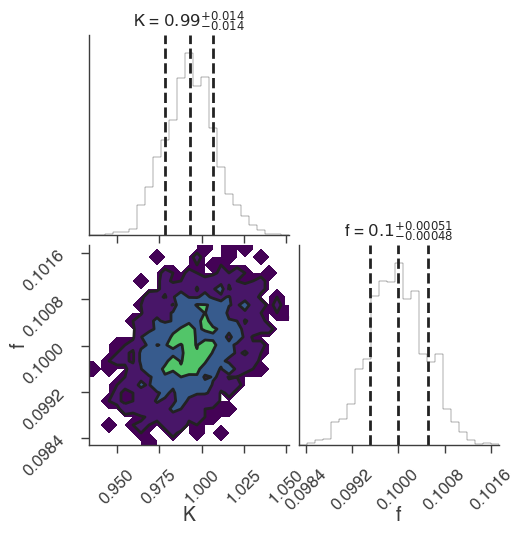

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()